# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [91]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
pn.extension('plotly')
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
import hvplot.pandas

# Initialize the Panel Extensions (for Plotly)
#above

In [92]:
# Read the Mapbox API key
load_dotenv("example.env")
mapbox_token = os.getenv("mapbox")

# Import Data

In [93]:
# Import the CSVs to Pandas DataFrames
sfo_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(sfo_path)

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [62]:
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [98]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    data = sfo_data.set_index('year')
    df_housing_units = data["housing_units"].groupby(data.index).mean()
    fig_housing_units = plt.figure()
    plot_housing_units = df_housing_units.plot.bar(color = "orange")
    plot_housing_units.set_xlabel("Year", fontsize=12)
    plot_housing_units.set_ylabel("Housing Units", fontsize=12)
    plot_housing_units.set_title(
        "Housing Units in San Francisco Per Year", fontsize=14, fontweight="bold"
    )
    # Optional Challenge: Use the min, max, and std to scale the y limits of the chart
    housing_units_std = df_housing_units.std()
    housing_units_min = min(df_housing_units)
    housing_units_max = max(df_housing_units)
    plot_housing_units.set_ylim(
    housing_units_min - housing_units_std, housing_units_max + housing_units_std
    )
    plt.close(fig_housing_units)
    return pn.pane.Matplotlib(fig_housing_units, tight=True)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""

    # YOUR CODE HERE!
    data = sfo_data.set_index('year')
    gross_rent = data[['gross_rent','sale_price_sqr_foot']]
    average_rent_sale_price = gross_rent.groupby('year').mean()
    average_gross_rent = data['gross_rent'].groupby('year').mean()
    plot_avg_gross_rent = px.line(average_gross_rent,title='Average Gross Rent in San Francisco Per Year')
    
    
    return pn.pane.Plotly(plot_avg_gross_rent)
    
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    data = sfo_data.set_index('year')
    sale_price = data[['gross_rent','sale_price_sqr_foot']]
    average_sale_price = sale_price.groupby('year').mean()
    average = data['sale_price_sqr_foot'].groupby('year').mean()
    plot_sale_price = px.line(average,title='Average Sales Price Per Year')
    
    return pn.pane.Plotly(plot_sale_price)

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    avg_price_per_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
    avg_price = avg_price_per_neighborhood.hvplot.line(x = 'year', xlabel = 'Year', y = 'sale_price_sqr_foot', ylabel = 'Sale Price per Square Foot', groupby="neighborhood", color = "aqua")
    
    return avg_price

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # YOUR CODE HERE!
    neighborhood_prices = sfo_data.groupby(['neighborhood']).mean()
    top_ten = neighborhood_prices.sort_values('sale_price_sqr_foot', ascending = False).drop(columns = 'year').head(10)
    
    neighborhood_top_ten = top_ten.drop(columns = ['housing_units', 'gross_rent'])
    neigh_top_ten = neighborhood_top_ten.hvplot(kind='bar', legend = False, figsize=(20,10), xlabel = 'Neighborhood', ylabel = 'Sale Price per Square Foot', title = "Top 10 Most Expensive Neighborhoods in San Francisco", color = "green")
    
    return neigh_top_ten

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!
    neighborhood_prices = sfo_data.groupby(['neighborhood']).mean()
    top_ten = neighborhood_prices.sort_values('sale_price_sqr_foot', ascending = False).drop(columns = 'year').head(10)
    top_ten_index = top_ten.reset_index()
    coordinates = px.parallel_coordinates(top_ten_index, color='sale_price_sqr_foot')
    
    return coordinates

def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    neighborhood_prices = sfo_data.groupby(['neighborhood']).mean()
    top_ten = neighborhood_prices.sort_values('sale_price_sqr_foot', ascending = False).drop(columns = 'year').head(10)
    top_ten_index = top_ten.reset_index()
    categories = px.parallel_categories(top_ten_index, color='sale_price_sqr_foot')
    
    return categories


def neighborhood_map():
    """Neighborhood Map"""
    
    # YOUR CODE HERE!
    file_path = Path("Data/neighborhoods_coordinates.csv")
    df_neighborhood_locations = pd.read_csv(file_path, index_col="Neighborhood")
    avg_per_neighborhood = sfo_data.groupby(['neighborhood']).mean().drop(columns = 'year')    
    averages_df = pd.concat([df_neighborhood_locations, avg_per_neighborhood], axis = "columns", join = "inner")    
    data_to_plot = averages_df[["Lat", "Lon", "sale_price_sqr_foot", "gross_rent"]]
    px.set_mapbox_access_token(mapbox_token)
    my_map = px.scatter_mapbox(
        data_to_plot,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        title= "Average Sale Price per Square Foot and Gross Rent in San Francisco"
)

    # Display the map
    return my_map

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Column
        [0] Column
            [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Matplotlib(Figure, tight=True)
        [1] Plotly(Figure)
    [2] Row
        [0] Plotly(Figure)
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive04645')
                    [0] HoloViews(DynamicMap, name='interactive04645')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [1] HoloViews(Bars)
    [4] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
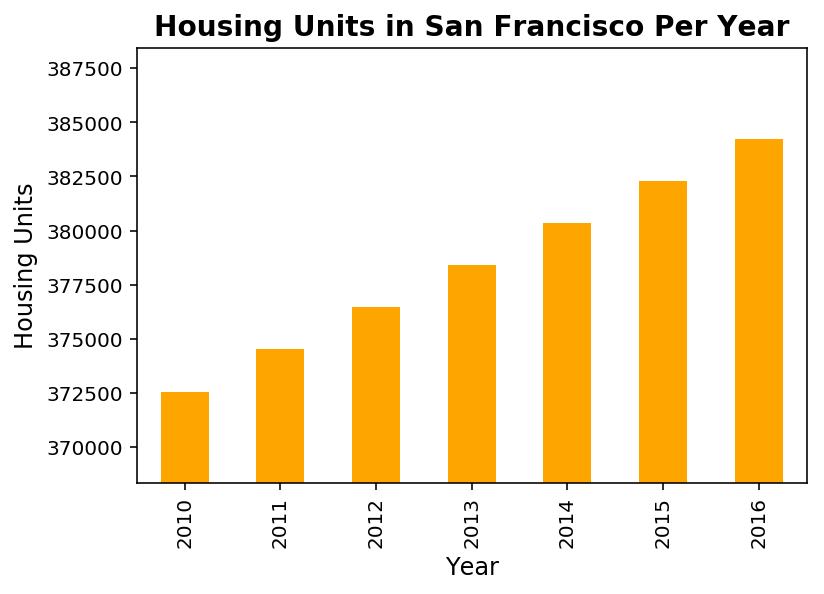

In [99]:
# YOUR CODE HERE!
title = '#Analysis of San Francisco Real Estate from 2010-2016'
welcome_tab = pn.Column(pn.Column(title), neighborhood_map())

housing_market = pn.Row(housing_units_per_year(), average_sales_price())

rental_market = pn.Row(average_gross_rent())


neighborhood_analysis = pn.Column(interact(average_price_by_neighborhood),top_most_expensive_neighborhoods())


parallel_plots_tab = pn.Column( 
    parallel_categories(),
    parallel_coordinates()
)


# Create tabs

San_Francisco = pn.Tabs(("Welcome", welcome_tab),
("Housing Sales Market", housing_market), 
("Rental Market", rental_market),
("Neighborhood Analysis", neighborhood_analysis), 
("Analysis by Neighborhood", parallel_plots_tab))
San_Francisco

## Serve the Panel Dashboard

Tabs(active=3)
    [0] Column
        [0] Column
            [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Matplotlib(Figure, tight=True)
        [1] Plotly(Figure, viewport={'xaxis.range': [2010, ...})
    [2] Row
        [0] Plotly(Figure, viewport={'xaxis.range': [2010, ...})
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive03407')
                    [0] HoloViews(DynamicMap, name='interactive03407')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [1] HoloViews(Bars)
    [4] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
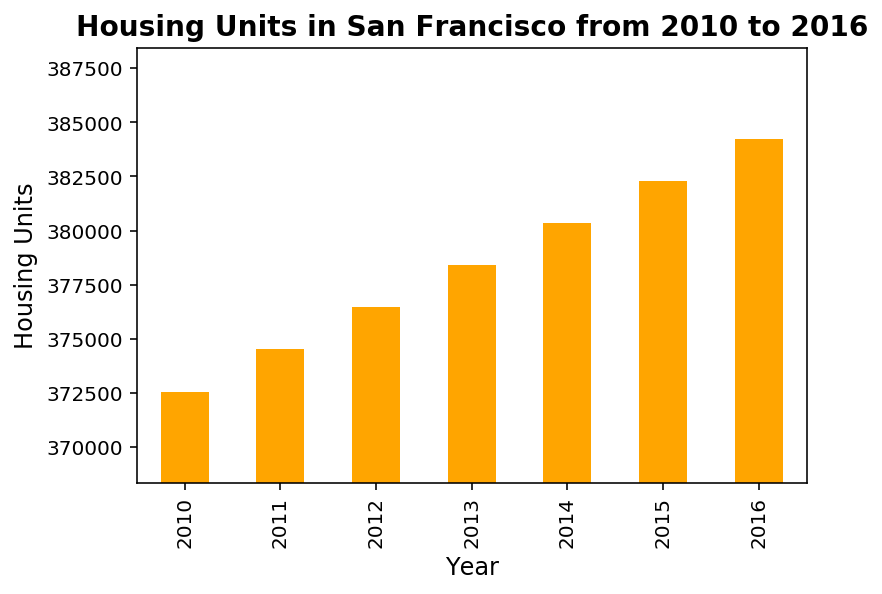

In [96]:
San_Francisco.servable()